In [71]:
import numpy as np
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
import matplotlib.pyplot as plt

def propTF(u1, L, lambda_, z):
    M, N = u1.shape
    dx = 1*L / M #L is the size of simulation region; not fully understand why the dx is defined this way
    k = 2 * np.pi / lambda_

    fx = np.linspace(-1/(2*dx), 1/(2*dx) - 1/L, M)
    FX, FY = np.meshgrid(fx, fx)

    H = np.exp(-1j * np.pi * lambda_ * z * (FX**2 + FY**2))
    H = fftshift(H)
    U1 = fft2(fftshift(u1))
    U2 = H * U1
    u2 = ifftshift(ifft2(U2))

    return u2

def gaussian_beam(X, Y, waist):
    return np.exp(-(X**2 + Y**2) / (2 * waist**2))


In [77]:
print(np.linspace(-10,10,10))

[-10.          -7.77777778  -5.55555556  -3.33333333  -1.11111111
   1.11111111   3.33333333   5.55555556   7.77777778  10.        ]


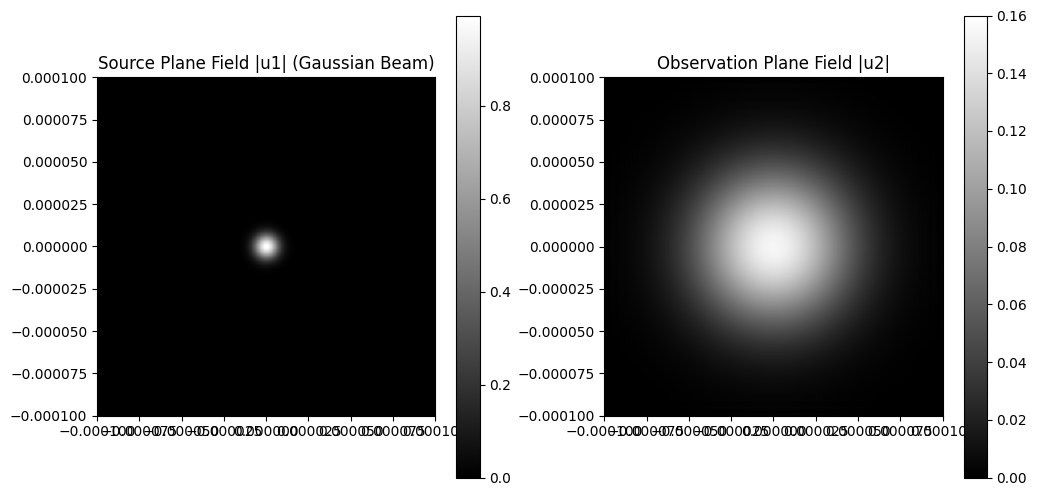

In [72]:
# Grid and Gaussian parameters
L = 200e-6  # size of the grid/size of simulation region
M = 256  # number of samples
lambda_ = 0.5e-6  # wavelength
z = 2000e-6  # propagation distance
waist = 5e-6  # waist of the Gaussian beam
x = np.linspace(-L/2, L/2, M)
y = np.linspace(-L/2, L/2, M)
X, Y = np.meshgrid(x, y)
# Initialize the Gaussian beam
u1 = gaussian_beam(X, Y, waist)
# Compute the observation plane field
u2 = propTF(u1, L, lambda_, z)
# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(u1), extent=(-L/2, L/2, -L/2, L/2), cmap='gray')
plt.title('Source Plane Field |u1| (Gaussian Beam)')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(np.abs(u2), extent=(-L/2, L/2, -L/2, L/2), cmap='gray', vmin=0, vmax=0.16)
plt.title('Observation Plane Field |u2|')
plt.colorbar()
plt.show()


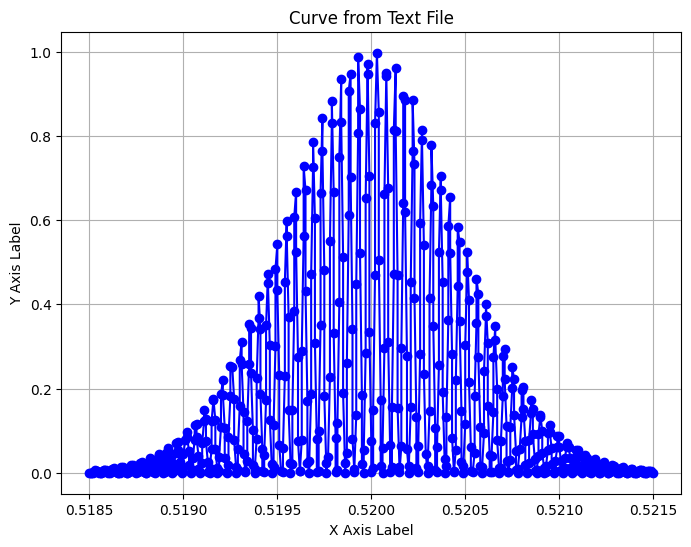

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from a text file
data = np.loadtxt('/Users/qingjunwang/Downloads/green.txt', delimiter=',')  # Adjust the delimiter based on your file

# Extract x and y coordinates
x = data[:, 0]
y = data[:, 1]

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b')  # Customize the plot with markers, line styles, and colors
plt.title('Curve from Text File')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.grid(True)
plt.show()

In [2]:
len(x)

589